# Case Study: Regression

## Scenario

-------------------------------------------------------------------------------------------------------
You are working as an analyst for a real estate company. Your company wants to build a machine learning model to predict the selling prices of houses based on a variety of features on which the value of the house is evaluated.

------------------------------------------------------------------------------------------------------------

## Objective

----------------------------------------------------------------------------------------------------
Your job is to build a model that will predict the price of a house based on features provided in the dataset. Senior management also wants to explore the characteristics of the houses using some business intelligence tools. One of those parameters includes understanding which factors are responsible for higher property value - $650K and above.

---------------------------------------------------------------------------------------------

## Dataset

--------------------------------------------------------------------------------------------
It consists of information on 22,000 properties. The dataset consists of historic data of houses sold between May 2014 to May 2015.

These are the definitions of data points provided:

Note: For some of the variables are self-explanatory, no definition has been provided.

- Id: Unique identification number for the property
- date: the date the house was sold
- price: the price of the house
- waterfront: the house which has a view to a waterfront
- condition: How good the condition is (Overall). 1 indicates worn-out property and 5 excellent.
- grade: Overall grade given to the housing unit, based on the King County grading system. 1 poor, 13 excellent.
- Sqft_above: square footage of house apart from the basement
- Sqft_living15: Living room area in 2015(implies-- some renovations) This might or might not have affected the lotSize area.
- Sqft_lot15: lotSize area in 2015(implies-- some renovations)
    
---------------------------------------------------------------------------------------------

### 1. Data Cleaning

In [1]:
# Importing necessary libraries
import pandas as pd

In [2]:
# Loading the data into a df
df = pd.read_csv("C:\\Users\\mafal\\Documents\\ironhack\\projects\\data_mid_bootcamp_project_regression\\regression_data.csv")

#### 1.1 Describe method

In [3]:
df.head()

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
0,7129300520,10/13/14,3,1.00,1180,5650,1.0,0,0,3,...,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,221900
1,6414100192,12/9/14,3,2.25,2570,7242,2.0,0,0,3,...,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,538000
2,5631500400,2/25/15,2,1.00,770,10000,1.0,0,0,3,...,770,0,1933,0,98028,47.7379,-122.233,2720,8062,180000
3,2487200875,12/9/14,4,3.00,1960,5000,1.0,0,0,5,...,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,604000
4,1954400510,2/18/15,3,2.00,1680,8080,1.0,0,0,3,...,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,510000


In [4]:
df.shape

(21597, 21)

In [5]:
df.describe

<bound method NDFrame.describe of                id      date  bedrooms  bathrooms  sqft_living  sqft_lot  \
0      7129300520  10/13/14         3       1.00         1180      5650   
1      6414100192   12/9/14         3       2.25         2570      7242   
2      5631500400   2/25/15         2       1.00          770     10000   
3      2487200875   12/9/14         4       3.00         1960      5000   
4      1954400510   2/18/15         3       2.00         1680      8080   
...           ...       ...       ...        ...          ...       ...   
21592   263000018   5/21/14         3       2.50         1530      1131   
21593  6600060120   2/23/15         4       2.50         2310      5813   
21594  1523300141   6/23/14         2       0.75         1020      1350   
21595   291310100   1/16/15         3       2.50         1600      2388   
21596  1523300157  10/15/14         2       0.75         1020      1076   

       floors  waterfront  view  condition  ...  sqft_above  sqft

In [6]:
df.columns

Index(['id', 'date', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'price'],
      dtype='object')

##### 1.2 Checking null values

In [7]:
df.isna().sum()

id               0
date             0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
price            0
dtype: int64

#### 1.3 Checking Column Types

In [8]:
# Display the data types of the DataFrame
print(df.dtypes)

id                 int64
date              object
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
price              int64
dtype: object


In [9]:
# Print the column name and unique values for each column
for column in df.columns:
    unique_values = df[column].unique()
    print(f"Column: {column}")
    print(f"Unique values: {unique_values}\n")

Column: id
Unique values: [7129300520 6414100192 5631500400 ... 1523300141  291310100 1523300157]

Column: date
Unique values: ['10/13/14' '12/9/14' '2/25/15' '2/18/15' '5/12/14' '6/27/14' '1/15/15'
 '4/15/15' '3/12/15' '4/3/15' '5/27/14' '5/28/14' '10/7/14' '1/24/15'
 '7/31/14' '5/29/14' '12/5/14' '4/24/15' '5/14/14' '8/26/14' '7/3/14'
 '5/16/14' '11/20/14' '11/3/14' '6/26/14' '12/1/14' '6/24/14' '3/2/15'
 '11/10/14' '12/3/14' '6/13/14' '12/30/14' '2/13/15' '6/20/14' '7/15/14'
 '8/11/14' '7/7/14' '10/28/14' '7/29/14' '7/18/14' '3/25/15' '7/16/14'
 '4/28/15' '3/11/15' '9/16/14' '2/17/15' '12/31/14' '2/5/15' '3/3/15'
 '8/19/14' '4/7/15' '8/27/14' '2/23/15' '12/10/14' '8/28/14' '10/21/14'
 '12/7/14' '6/3/14' '9/9/14' '10/9/14' '8/25/14' '6/12/14' '9/12/14'
 '1/5/15' '6/10/14' '7/10/14' '3/16/15' '11/5/14' '4/20/15' '6/9/14'
 '3/23/15' '12/2/14' '12/22/14' '1/28/15' '6/2/14' '11/14/14' '6/18/14'
 '5/19/14' '9/4/14' '5/22/14' '2/26/15' '7/25/14' '12/23/14' '9/8/14'
 '3/30/15' '7/11/14' '6/

--------------------------------------------------------------------------------------------------------
Bathroom explanation:
    
    - 1 -- full bathroom (sink, toilet, tub AND shower)
    - 1.25 -- one full bathroom (sink, toilet, tub AND shower) and 1/4 bathroom (toilet)
    - 1.5 -- one full bathroom (sink, toilet, tub AND shower) and one half bathroom (toilet and sink)
    - 1.75 -- one full bathroom (sink, toilet, tub AND shower) and 3/4 bathroom (sink, toilet tub OR shower)
    
-------------------------------------------------------------------------------------------------------

-------------------------------------------------------------------------------------------------
The following columns are used as a classification feature, so it would make sense to convert them into category:
- waterfront
- condition
- grade
zipcode

And since id is the unique key, we shouldn't see it necessarily as a numerical column, therefore we can also convert it into type category.

------------------------------------------------------------------------------------------------

In [10]:
# List of columns to convert to categorical
columns_to_convert = ['waterfront', 'condition', 'grade', 'id', 'zipcode']

# Convert specified columns to categorical
for col in columns_to_convert:
    df[col] = df[col].astype('object')
    
# Display the data types of the DataFrame
print(df.dtypes)

id                object
date              object
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront        object
view               int64
condition         object
grade             object
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode           object
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
price              int64
dtype: object


#### 1.4 Cleaning Duplicates

In [11]:
# Filter and display duplicated rows
df[df['id'].duplicated() == True]

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
94,6021501535,12/23/14,3,1.50,1580,5000,1.0,0,0,3,...,1290,290,1939,0,98117,47.6870,-122.386,1570,4500,700000
314,4139480200,12/9/14,4,3.25,4290,12103,1.0,0,3,3,...,2690,1600,1997,0,98006,47.5503,-122.102,3860,11244,1400000
325,7520000520,3/11/15,2,1.00,1240,12092,1.0,0,0,3,...,960,280,1922,1984,98146,47.4957,-122.352,1820,7460,240500
346,3969300030,12/29/14,4,1.00,1000,7134,1.0,0,0,3,...,1000,0,1943,0,98178,47.4897,-122.240,1020,7138,239900
372,2231500030,3/24/15,4,2.25,2180,10754,1.0,0,0,5,...,1100,1080,1954,0,98133,47.7711,-122.341,1810,6929,530000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20165,7853400250,2/19/15,4,3.50,2910,5260,2.0,0,0,3,...,2910,0,2012,0,98065,47.5168,-121.883,2910,5260,645000
20597,2724049222,12/1/14,2,2.50,1000,1092,2.0,0,0,3,...,990,10,2004,0,98118,47.5419,-122.271,1330,1466,220000
20654,8564860270,3/30/15,4,2.50,2680,5539,2.0,0,0,3,...,2680,0,2013,0,98045,47.4759,-121.734,2680,5992,502000
20764,6300000226,5/4/15,4,1.00,1200,2171,1.5,0,0,3,...,1200,0,1933,0,98133,47.7076,-122.342,1130,1598,380000


In [12]:
df[df['id']==6021501535]

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
93,6021501535,7/25/14,3,1.5,1580,5000,1.0,0,0,3,...,1290,290,1939,0,98117,47.687,-122.386,1570,4500,430000
94,6021501535,12/23/14,3,1.5,1580,5000,1.0,0,0,3,...,1290,290,1939,0,98117,47.687,-122.386,1570,4500,700000


In [13]:
# Print column id, date (which differs in value) and grade which isn't displayed due to lack of space
df[df['id'] == 6021501535][['id', 'date', 'grade','price']]

,id,date,grade,price
93,6021501535,7/25/14,8,430000
94,6021501535,12/23/14,8,700000


In [14]:
df[df['id']==4139480200]

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
313,4139480200,6/18/14,4,3.25,4290,12103,1.0,0,3,3,...,2690,1600,1997,0,98006,47.5503,-122.102,3860,11244,1380000
314,4139480200,12/9/14,4,3.25,4290,12103,1.0,0,3,3,...,2690,1600,1997,0,98006,47.5503,-122.102,3860,11244,1400000


In [15]:
# Print column id, date (which differs in value) and grade which isn't displayed due to lack of space
df[df['id'] == 4139480200][['id', 'date', 'grade','price']]

,id,date,grade,price
313,4139480200,6/18/14,11,1380000
314,4139480200,12/9/14,11,1400000


-------------------------------------------------------------------------------------------------------
To clean the duplicates we'll keep only the rows with the most recent date.

------------------------------------------------------------------------------------------------------

In [16]:
# Function that cleans the duplicates keeping the rows with the most recent date
def keep_latest_date(df, id_col, date_col):
    # Convert the date column to datetime type
    df[date_col] = pd.to_datetime(df[date_col])

    # Sort the DataFrame by the ID and date columns in descending order
    df.sort_values(by=[id_col, date_col], ascending=False, inplace=True)

    # Drop duplicates, keeping the first (latest) occurrence
    df.drop_duplicates(subset=id_col, keep='first', inplace=True)

    return df

In [17]:
# Applying the function defined above
cleaned_df = df.copy()
cleaned_df = keep_latest_date(cleaned_df, 'id', 'date')

# Filter and display duplicated rows
cleaned_df[cleaned_df['id'].duplicated() == True]

C:\Users\mafal\AppData\Local\Temp\ipykernel_13972\338765205.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[date_col] = pd.to_datetime(df[date_col])


,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price


In [18]:
# Display the data types of the DataFrame
print(cleaned_df.dtypes)

id                       object
date             datetime64[ns]
bedrooms                  int64
bathrooms               float64
sqft_living               int64
sqft_lot                  int64
floors                  float64
waterfront               object
view                      int64
condition                object
grade                    object
sqft_above                int64
sqft_basement             int64
yr_built                  int64
yr_renovated              int64
zipcode                  object
lat                     float64
long                    float64
sqft_living15             int64
sqft_lot15                int64
price                     int64
dtype: object


#### 1.5 Extra cleaning

------------------------------------------------------------------------------
Bedrooms

---------------------------------------------------------------------------------

In [19]:
# Check the row that has 33 bedrooms
cleaned_df[cleaned_df["bedrooms"] == 33]

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
15856,2402100895,2014-06-25,33,1.75,1620,6000,1.0,0,0,5,...,1040,580,1947,0,98103,47.6878,-122.331,1330,4700,640000


In [20]:
# We are going to drop the row that has 33 bedrooms, because it doesn't add up with the rest of the information
final_df = cleaned_df[cleaned_df['bedrooms'] != 33]

--------------------------------------------------------------------------------------------------
Year Renovated

--------------------------------------------------------------------------------------------------

In [21]:
# Print how many properties have been renovated
final_df[final_df['yr_renovated'] != 0]

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
5822,9829200250,2015-01-05,3,2.00,2600,6600,2.0,0,4,3,...,1930,670,1970,2014,98122,47.6055,-122.285,2670,6270,1700000
18470,9828701690,2014-08-06,3,2.00,1530,3400,1.0,0,0,3,...,990,540,1907,2014,98112,47.6204,-122.296,1880,4212,529000
1276,9828700200,2014-05-05,4,3.00,2170,4000,2.0,0,0,4,...,1610,560,1982,2011,98112,47.6196,-122.292,1670,4000,831000
10880,9828200746,2015-05-04,2,1.50,1120,1024,2.0,0,0,3,...,1120,0,1970,1998,98122,47.6175,-122.298,1120,1549,440000
11815,9828200187,2015-04-29,2,1.00,750,2020,1.0,0,0,3,...,750,0,1908,1995,98122,47.6175,-122.301,1630,2383,370000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
216,46100204,2015-02-21,5,3.00,3300,33474,1.0,0,3,3,...,1870,1430,1957,1991,98040,47.5673,-122.210,3836,20953,1510000
4739,31000165,2014-09-11,5,3.50,3620,7821,2.0,0,2,3,...,2790,830,1958,2010,98040,47.5738,-122.215,2690,9757,1490000
11690,16000200,2014-10-24,3,2.25,1640,4420,2.0,0,0,4,...,1640,0,1918,1983,98002,47.3110,-122.210,1230,6632,250000
8668,9000025,2014-12-03,2,1.00,1420,4635,2.0,0,0,4,...,1420,0,1941,1973,98115,47.6800,-122.304,1810,4635,496000


In [22]:
# Print how many properties have been renovated yet there's no record of the year
final_df[((final_df["sqft_living15"] != final_df["sqft_living"]) | (final_df["sqft_lot"] != final_df["sqft_lot15"])) & (final_df["yr_renovated"] == 0)]

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
15937,9900000190,2014-10-30,3,1.00,1320,8100,1.0,0,0,3,...,880,440,1943,0,98166,47.4697,-122.351,1000,8100,268950
20963,9895000040,2014-07-03,2,1.75,1410,1005,1.5,0,0,3,...,900,510,2011,0,98027,47.5446,-122.018,1440,1188,399900
7614,9842300540,2014-06-24,3,1.00,1100,4128,1.0,0,0,4,...,720,380,1942,0,98126,47.5296,-122.379,1510,4538,339000
3257,9842300485,2015-03-11,2,1.00,1040,7372,1.0,0,0,5,...,840,200,1939,0,98126,47.5285,-122.378,1930,5150,380000
16723,9842300095,2014-07-25,5,2.00,1600,4168,1.5,0,0,3,...,1600,0,1927,0,98126,47.5297,-122.381,1190,4168,365000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18506,3600072,2015-03-30,4,2.75,2220,5310,1.0,0,0,5,...,1170,1050,1951,0,98144,47.5801,-122.294,1540,4200,680000
8800,2800031,2015-04-01,3,1.00,1430,7599,1.5,0,0,4,...,1010,420,1930,0,98168,47.4783,-122.265,1290,10320,235000
8404,1200021,2014-08-11,3,1.00,1460,43000,1.0,0,0,3,...,1460,0,1952,0,98166,47.4434,-122.347,2250,20023,400000
6729,1200019,2014-05-08,4,1.75,2060,26036,1.0,0,0,4,...,1160,900,1947,0,98166,47.4444,-122.351,2590,21891,647500


In [23]:
# Print how many properties have not been renovated
final_df[((final_df["sqft_living15"] == final_df["sqft_living"]) & (final_df["sqft_lot"] == final_df["sqft_lot15"])) & (final_df["yr_renovated"] == 0)]

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
4817,9839301060,2015-04-06,3,1.75,1740,4400,1.5,0,0,3,...,1740,0,1903,0,98122,47.6115,-122.292,1740,4400,650500
3226,9808700405,2014-06-04,3,2.50,2660,13367,2.0,0,2,3,...,2660,0,1992,0,98004,47.6501,-122.217,2660,13367,1900000
15098,9558900010,2014-10-06,3,2.50,2680,5860,2.0,0,0,3,...,2680,0,2001,0,98011,47.7557,-122.223,2680,5860,549950
13985,9558050230,2015-05-07,4,3.50,3450,6873,2.0,0,0,3,...,2750,700,2004,0,98058,47.4590,-122.118,3450,6873,590000
5029,9558040050,2014-09-19,4,2.75,3080,6731,2.0,0,3,3,...,3080,0,2003,0,98058,47.4522,-122.118,3080,6731,550000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19782,255450340,2014-08-27,3,2.50,2370,4200,2.0,0,0,3,...,2370,0,2014,0,98038,47.3696,-122.018,2370,4200,387865
9616,240000031,2015-03-13,4,2.25,1940,10200,1.0,0,0,3,...,1360,580,1960,0,98188,47.4253,-122.283,1940,10200,322000
14612,179001046,2014-05-08,3,2.50,1190,3000,2.0,0,0,3,...,1190,0,2002,0,98178,47.4933,-122.275,1190,3000,229000
19461,110000040,2015-03-17,5,1.50,1820,8712,1.0,0,0,5,...,1090,730,1960,0,98032,47.3712,-122.289,1820,8712,278000


In [24]:
# Print how many properties whose sqft_living and sqft_lot have not changed but there's records of yr_renovated
final_df[((final_df["sqft_living15"] == final_df["sqft_living"]) & (final_df["sqft_lot"] == final_df["sqft_lot15"])) & (final_df["yr_renovated"] != 0)]

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
19327,9297301050,2014-06-18,3,1.75,1510,4800,1.0,0,2,3,...,860,650,1925,2011,98126,47.5667,-122.372,1510,4800,465000
19472,8075400530,2014-06-27,4,1.00,1390,18000,1.0,0,0,3,...,1390,0,1955,2013,98032,47.3885,-122.284,1390,18000,234000
7878,5015000180,2014-11-10,3,2.00,1720,4200,2.0,0,0,3,...,1720,0,1908,1992,98112,47.6285,-122.301,1720,4200,713500
11789,4365200445,2014-08-22,2,1.75,1250,7680,1.0,0,0,3,...,1250,0,1922,1968,98126,47.5242,-122.371,1250,7680,400000
18993,4077800474,2014-11-24,4,1.75,1920,7455,1.0,0,0,4,...,960,960,1939,1964,98125,47.7106,-122.286,1920,7455,571500
4050,4022906430,2014-06-30,3,2.25,2070,15002,1.5,0,0,3,...,2070,0,1955,2013,98155,47.7635,-122.274,2070,15002,560000
9800,3797000400,2014-11-25,4,2.25,1880,3000,2.0,0,0,3,...,1760,120,1909,1977,98103,47.6864,-122.349,1880,3000,616500
13306,2649500155,2014-06-10,5,3.25,2750,7500,2.0,0,1,3,...,2150,600,1937,1997,98033,47.6636,-122.203,2750,7500,750000
10180,2648000071,2015-03-06,4,1.75,1420,10300,2.0,0,0,3,...,1420,0,1950,2001,98002,47.3121,-122.215,1420,10300,225000
3495,2331300025,2015-03-11,4,3.25,1860,4356,2.0,0,0,3,...,1860,0,1917,2005,98103,47.6785,-122.351,1860,4356,967000


--------------------------------------------------------------------------------------------------
Since the yr_ronoveted column shows some inconsistences, we'll check the difference between sqft_living, sqft_living15 and sqft_lot and sqft_lot15

-----------------------------------------------------------------------------------------------

In [25]:
# Checking which houses that have experienced a renovation  
df2 = final_df.copy()

df2['sqft_living_diff'] = abs(df2['sqft_living'] - df2['sqft_living15'])
df2['sqft_lot_diff'] = abs(df2['sqft_lot'] - df2['sqft_lot15'])

df2

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price,sqft_living_diff,sqft_lot_diff
15937,9900000190,2014-10-30,3,1.00,1320,8100,1.0,0,0,3,...,1943,0,98166,47.4697,-122.351,1000,8100,268950,320,0
20963,9895000040,2014-07-03,2,1.75,1410,1005,1.5,0,0,3,...,2011,0,98027,47.5446,-122.018,1440,1188,399900,30,183
7614,9842300540,2014-06-24,3,1.00,1100,4128,1.0,0,0,4,...,1942,0,98126,47.5296,-122.379,1510,4538,339000,410,410
3257,9842300485,2015-03-11,2,1.00,1040,7372,1.0,0,0,5,...,1939,0,98126,47.5285,-122.378,1930,5150,380000,890,2222
16723,9842300095,2014-07-25,5,2.00,1600,4168,1.5,0,0,3,...,1927,0,98126,47.5297,-122.381,1190,4168,365000,410,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3553,3600057,2015-03-19,4,2.00,1650,3504,1.0,0,0,3,...,1951,2013,98144,47.5803,-122.294,1480,3504,402500,170,0
8800,2800031,2015-04-01,3,1.00,1430,7599,1.5,0,0,4,...,1930,0,98168,47.4783,-122.265,1290,10320,235000,140,2721
8404,1200021,2014-08-11,3,1.00,1460,43000,1.0,0,0,3,...,1952,0,98166,47.4434,-122.347,2250,20023,400000,790,22977
6729,1200019,2014-05-08,4,1.75,2060,26036,1.0,0,0,4,...,1947,0,98166,47.4444,-122.351,2590,21891,647500,530,4145


#### 1.6 Creating additional columns

---------------------------------------------------------------------------------------------------
Since the column yr_renovated was dropped due to data inconsistencies. We can create a boolean column, 'renovated', that indicates if the
property was renovated or not.

    - 0: was not renovated
    - 1: was renovated

-----------------------------------------------------------------------------------------------------

In [26]:
# Function that checks if a property was renovated or not
def was_renovated(old_sqft_living, new_sqft_living, old_sqft_lot, new_sqft_lot, yr_renovated):
    
    sqft_living_diff = abs(new_sqft_living - old_sqft_living)
    sqft_lot_diff = abs(new_sqft_lot - old_sqft_lot)
    
    if (sqft_living_diff == 0 and sqft_lot_diff == 0) and yr_renovated == 0:
        return 0
    else:
        return 1
    

In [27]:
# Testing function was_renovated
renovated = was_renovated(1320, 1320, 8100, 8100, 0)

if renovated == 1:
    print('Property was renovated')
else:
    print('Property was not renovated')

Property was not renovated


In [28]:
# Apply the function to create the 'renovated' column
final_df['renovated'] = final_df.apply(lambda row: was_renovated(row['sqft_living'], row['sqft_living15'], row['sqft_lot'], row['sqft_lot15'], row['yr_renovated']), axis=1)

final_df

C:\Users\mafal\AppData\Local\Temp\ipykernel_13972\2598635213.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df['renovated'] = final_df.apply(lambda row: was_renovated(row['sqft_living'], row['sqft_living15'], row['sqft_lot'], row['sqft_lot15'], row['yr_renovated']), axis=1)


,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price,renovated
15937,9900000190,2014-10-30,3,1.00,1320,8100,1.0,0,0,3,...,440,1943,0,98166,47.4697,-122.351,1000,8100,268950,1
20963,9895000040,2014-07-03,2,1.75,1410,1005,1.5,0,0,3,...,510,2011,0,98027,47.5446,-122.018,1440,1188,399900,1
7614,9842300540,2014-06-24,3,1.00,1100,4128,1.0,0,0,4,...,380,1942,0,98126,47.5296,-122.379,1510,4538,339000,1
3257,9842300485,2015-03-11,2,1.00,1040,7372,1.0,0,0,5,...,200,1939,0,98126,47.5285,-122.378,1930,5150,380000,1
16723,9842300095,2014-07-25,5,2.00,1600,4168,1.5,0,0,3,...,0,1927,0,98126,47.5297,-122.381,1190,4168,365000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3553,3600057,2015-03-19,4,2.00,1650,3504,1.0,0,0,3,...,890,1951,2013,98144,47.5803,-122.294,1480,3504,402500,1
8800,2800031,2015-04-01,3,1.00,1430,7599,1.5,0,0,4,...,420,1930,0,98168,47.4783,-122.265,1290,10320,235000,1
8404,1200021,2014-08-11,3,1.00,1460,43000,1.0,0,0,3,...,0,1952,0,98166,47.4434,-122.347,2250,20023,400000,1
6729,1200019,2014-05-08,4,1.75,2060,26036,1.0,0,0,4,...,900,1947,0,98166,47.4444,-122.351,2590,21891,647500,1


In [29]:
# Filtering the properties that have been renovated but there's no record of the renovation year
final_df[((final_df['renovated']==1) & (final_df['yr_renovated']==0))]

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price,renovated
15937,9900000190,2014-10-30,3,1.00,1320,8100,1.0,0,0,3,...,440,1943,0,98166,47.4697,-122.351,1000,8100,268950,1
20963,9895000040,2014-07-03,2,1.75,1410,1005,1.5,0,0,3,...,510,2011,0,98027,47.5446,-122.018,1440,1188,399900,1
7614,9842300540,2014-06-24,3,1.00,1100,4128,1.0,0,0,4,...,380,1942,0,98126,47.5296,-122.379,1510,4538,339000,1
3257,9842300485,2015-03-11,2,1.00,1040,7372,1.0,0,0,5,...,200,1939,0,98126,47.5285,-122.378,1930,5150,380000,1
16723,9842300095,2014-07-25,5,2.00,1600,4168,1.5,0,0,3,...,0,1927,0,98126,47.5297,-122.381,1190,4168,365000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18506,3600072,2015-03-30,4,2.75,2220,5310,1.0,0,0,5,...,1050,1951,0,98144,47.5801,-122.294,1540,4200,680000,1
8800,2800031,2015-04-01,3,1.00,1430,7599,1.5,0,0,4,...,420,1930,0,98168,47.4783,-122.265,1290,10320,235000,1
8404,1200021,2014-08-11,3,1.00,1460,43000,1.0,0,0,3,...,0,1952,0,98166,47.4434,-122.347,2250,20023,400000,1
6729,1200019,2014-05-08,4,1.75,2060,26036,1.0,0,0,4,...,900,1947,0,98166,47.4444,-122.351,2590,21891,647500,1


In [30]:
# Filtering the properties that have not been renovated
final_df[final_df['renovated']==0]

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price,renovated
4817,9839301060,2015-04-06,3,1.75,1740,4400,1.5,0,0,3,...,0,1903,0,98122,47.6115,-122.292,1740,4400,650500,0
3226,9808700405,2014-06-04,3,2.50,2660,13367,2.0,0,2,3,...,0,1992,0,98004,47.6501,-122.217,2660,13367,1900000,0
15098,9558900010,2014-10-06,3,2.50,2680,5860,2.0,0,0,3,...,0,2001,0,98011,47.7557,-122.223,2680,5860,549950,0
13985,9558050230,2015-05-07,4,3.50,3450,6873,2.0,0,0,3,...,700,2004,0,98058,47.4590,-122.118,3450,6873,590000,0
5029,9558040050,2014-09-19,4,2.75,3080,6731,2.0,0,3,3,...,0,2003,0,98058,47.4522,-122.118,3080,6731,550000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19782,255450340,2014-08-27,3,2.50,2370,4200,2.0,0,0,3,...,0,2014,0,98038,47.3696,-122.018,2370,4200,387865,0
9616,240000031,2015-03-13,4,2.25,1940,10200,1.0,0,0,3,...,580,1960,0,98188,47.4253,-122.283,1940,10200,322000,0
14612,179001046,2014-05-08,3,2.50,1190,3000,2.0,0,0,3,...,0,2002,0,98178,47.4933,-122.275,1190,3000,229000,0
19461,110000040,2015-03-17,5,1.50,1820,8712,1.0,0,0,5,...,730,1960,0,98032,47.3712,-122.289,1820,8712,278000,0


In [31]:
# Dropping the column yr_renovated as 20007 rows have experienced a renovation but the year renovated shows as 0
final_df = final_df.drop('yr_renovated', axis=1)

----------------------------------------------------------------------------------------------------
It could be relevant for us to know the major city and state of each location.

----------------------------------------------------------------------------------------------------

In [32]:
!pip install uszipcode

------------------------------------------------------------------------------------------------------------
First let's check if all zipcodes in our data frame are US zipcodes.

-----------------------------------------------------------------------------------------------------------

In [33]:
# Importing  uszipcode library in Python to validate whether a given zip code is in the United States
from uszipcode import SearchEngine

C:\Users\mafal\anaconda3\Lib\site-packages\fuzzywuzzy\fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


In [34]:
# Function that returns me 'True' in case all of those zipcodes are US zipcode and 'False' otherwise
def are_all_zipcodes_us(df, zipcode_column_name):
    search = SearchEngine()
    for zipcode in df[zipcode_column_name]:
        result = search.by_zipcode(zipcode)
        if not result:
            return False  # If any zip code is not found in the US, return False
    return True  # All zip codes are found in the US, return True

In [35]:
answer = are_all_zipcodes_us(final_df, 'zipcode')
print('Are all zipcodes in our dataframe from the US: ', answer)

Are all zipcodes in our dataframe from the US:  True


---------------------------------------------------------------------------------------------------------
It seems that all our zipcodes are from the US. Therefore it could be handy to have a column for major_city and state.

-----------------------------------------------------------------------------------------------------

In [36]:
# Function to retrieve city or region information for a given zip code
def get_city_region_from_zip(zip_code):
    search = SearchEngine()

    result = search.by_zipcode(zip_code)
    if result:
        return result.major_city, result.state
    else:
        return None, None

In [37]:
# Testing our function
city, state = get_city_region_from_zip('98199')
print(city, state) 

Seattle WA


In [38]:
# Apply the function to create 'major_city' and 'state' columns
final_df[['major_city', 'state']] = final_df['zipcode'].apply(lambda x: pd.Series(get_city_region_from_zip(x)))

# Display the updated DataFrame
final_df

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15,price,renovated,major_city,state
15937,9900000190,2014-10-30,3,1.00,1320,8100,1.0,0,0,3,...,1943,98166,47.4697,-122.351,1000,8100,268950,1,Seattle,WA
20963,9895000040,2014-07-03,2,1.75,1410,1005,1.5,0,0,3,...,2011,98027,47.5446,-122.018,1440,1188,399900,1,Issaquah,WA
7614,9842300540,2014-06-24,3,1.00,1100,4128,1.0,0,0,4,...,1942,98126,47.5296,-122.379,1510,4538,339000,1,Seattle,WA
3257,9842300485,2015-03-11,2,1.00,1040,7372,1.0,0,0,5,...,1939,98126,47.5285,-122.378,1930,5150,380000,1,Seattle,WA
16723,9842300095,2014-07-25,5,2.00,1600,4168,1.5,0,0,3,...,1927,98126,47.5297,-122.381,1190,4168,365000,1,Seattle,WA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3553,3600057,2015-03-19,4,2.00,1650,3504,1.0,0,0,3,...,1951,98144,47.5803,-122.294,1480,3504,402500,1,Seattle,WA
8800,2800031,2015-04-01,3,1.00,1430,7599,1.5,0,0,4,...,1930,98168,47.4783,-122.265,1290,10320,235000,1,Seattle,WA
8404,1200021,2014-08-11,3,1.00,1460,43000,1.0,0,0,3,...,1952,98166,47.4434,-122.347,2250,20023,400000,1,Seattle,WA
6729,1200019,2014-05-08,4,1.75,2060,26036,1.0,0,0,4,...,1947,98166,47.4444,-122.351,2590,21891,647500,1,Seattle,WA


In [39]:
# Check unique values in the 'major_city' column
unique_major_cities = final_df['major_city'].unique()
print("Unique major cities:", unique_major_cities)

# Check unique values in the 'state' column
unique_states = final_df['state'].unique()
print("Unique states:", unique_states)

Unique major cities: ['Seattle' 'Issaquah' 'Kent' 'Bellevue' 'Kirkland' 'Enumclaw'
 'Federal Way' 'Redmond' 'Kenmore' 'Bothell' 'Renton' 'Woodinville'
 'Sammamish' 'Auburn' 'Maple Valley' 'Duvall' 'North Bend' 'Snoqualmie'
 'Mercer Island' 'Black Diamond' 'Medina' 'Vashon' 'Fall City' 'Carnation']
Unique states: ['WA']


---------------------------------------------------------------------------------------------
It seems that the proporties in our dataframe are all located in Washington state.

---------------------------------------------------------------------------------------------

In [40]:
final_df

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15,price,renovated,major_city,state
15937,9900000190,2014-10-30,3,1.00,1320,8100,1.0,0,0,3,...,1943,98166,47.4697,-122.351,1000,8100,268950,1,Seattle,WA
20963,9895000040,2014-07-03,2,1.75,1410,1005,1.5,0,0,3,...,2011,98027,47.5446,-122.018,1440,1188,399900,1,Issaquah,WA
7614,9842300540,2014-06-24,3,1.00,1100,4128,1.0,0,0,4,...,1942,98126,47.5296,-122.379,1510,4538,339000,1,Seattle,WA
3257,9842300485,2015-03-11,2,1.00,1040,7372,1.0,0,0,5,...,1939,98126,47.5285,-122.378,1930,5150,380000,1,Seattle,WA
16723,9842300095,2014-07-25,5,2.00,1600,4168,1.5,0,0,3,...,1927,98126,47.5297,-122.381,1190,4168,365000,1,Seattle,WA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3553,3600057,2015-03-19,4,2.00,1650,3504,1.0,0,0,3,...,1951,98144,47.5803,-122.294,1480,3504,402500,1,Seattle,WA
8800,2800031,2015-04-01,3,1.00,1430,7599,1.5,0,0,4,...,1930,98168,47.4783,-122.265,1290,10320,235000,1,Seattle,WA
8404,1200021,2014-08-11,3,1.00,1460,43000,1.0,0,0,3,...,1952,98166,47.4434,-122.347,2250,20023,400000,1,Seattle,WA
6729,1200019,2014-05-08,4,1.75,2060,26036,1.0,0,0,4,...,1947,98166,47.4444,-122.351,2590,21891,647500,1,Seattle,WA


In [41]:
final_df.shape

(21419, 23)

In [42]:
final_df.describe

<bound method NDFrame.describe of                id       date  bedrooms  bathrooms  sqft_living  sqft_lot  \
15937  9900000190 2014-10-30         3       1.00         1320      8100   
20963  9895000040 2014-07-03         2       1.75         1410      1005   
7614   9842300540 2014-06-24         3       1.00         1100      4128   
3257   9842300485 2015-03-11         2       1.00         1040      7372   
16723  9842300095 2014-07-25         5       2.00         1600      4168   
...           ...        ...       ...        ...          ...       ...   
3553      3600057 2015-03-19         4       2.00         1650      3504   
8800      2800031 2015-04-01         3       1.00         1430      7599   
8404      1200021 2014-08-11         3       1.00         1460     43000   
6729      1200019 2014-05-08         4       1.75         2060     26036   
2495      1000102 2015-04-22         6       3.00         2400      9373   

       floors waterfront  view condition  ... yr_buil

In [43]:
final_df.isna().sum()

id               0
date             0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
price            0
renovated        0
major_city       0
state            0
dtype: int64

In [44]:
# Display the data types of the final DataFrame
print(final_df.dtypes)

id                       object
date             datetime64[ns]
bedrooms                  int64
bathrooms               float64
sqft_living               int64
sqft_lot                  int64
floors                  float64
waterfront               object
view                      int64
condition                object
grade                    object
sqft_above                int64
sqft_basement             int64
yr_built                  int64
zipcode                  object
lat                     float64
long                    float64
sqft_living15             int64
sqft_lot15                int64
price                     int64
renovated                 int64
major_city               object
state                    object
dtype: object


-------------------------------------------------------------------------------------------
The file we just exported will now be used to answer the SQL questions.

-------------------------------------------------------------------------------------------

In [45]:
# Export to a CSV file
#final_df.to_csv('C:\\Users\\mafal\\Documents\\ironhack\\projects\\data_mid_bootcamp_project_regression\\regression_data_cleaned.csv', index=False)

### 2. Visualizations 

#### 2.1 Numerical variables

In [50]:
numericals = ['price', 'sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement', 'sqft_living15', 'sqft_lot15']

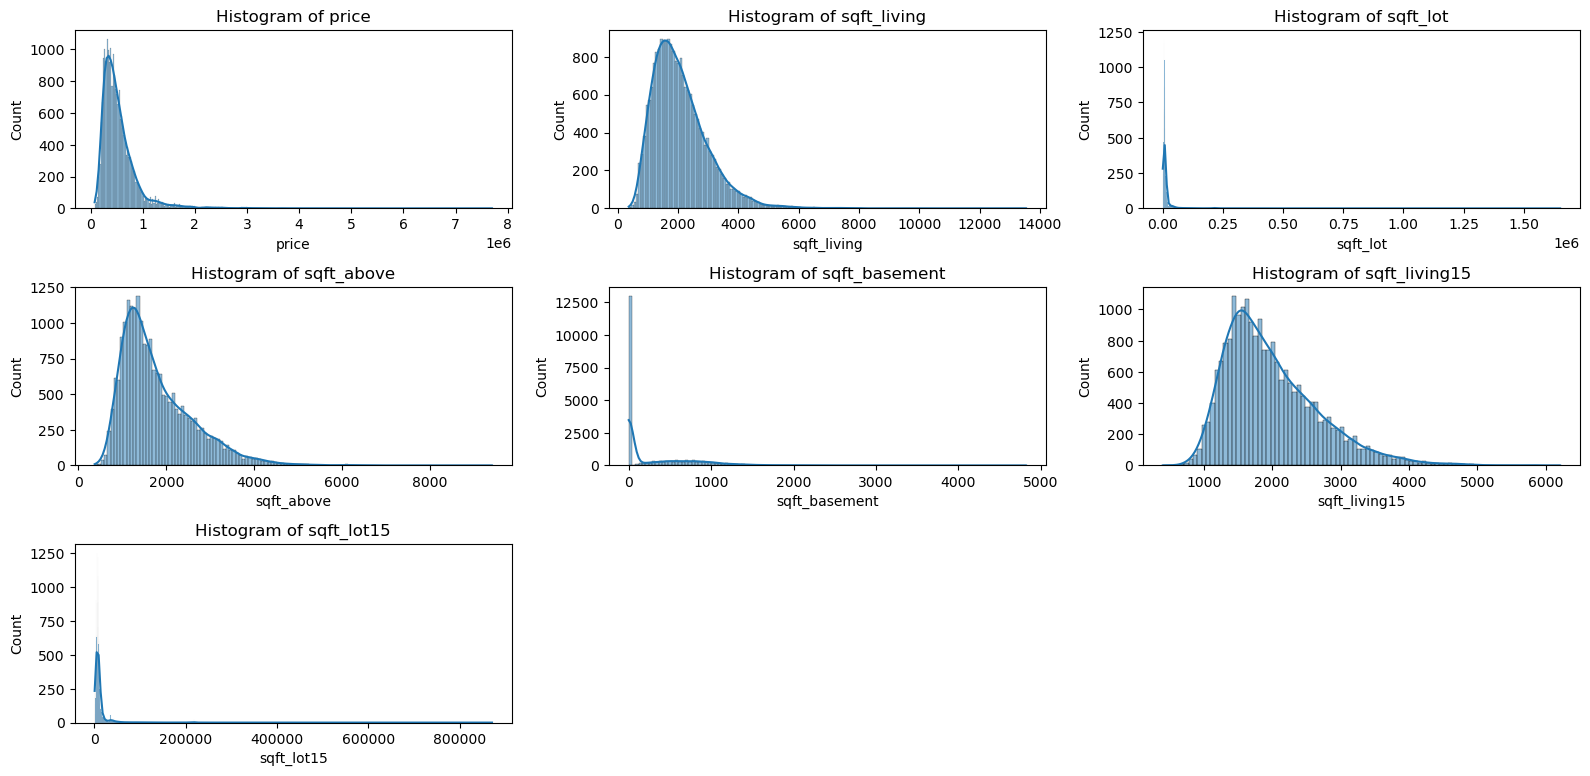

In [51]:
# Visualize numerical variables using histograms
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(16, 10))

for column in numericals:
    plt.subplot(4, 3, numericals.index(column) + 1)
    sns.histplot(final_df[column], kde=True)
    plt.title(f'Histogram of {column}')

plt.tight_layout()
plt.show()

#### 2.2 Categorical variables

In [56]:
categoricals = ['bedrooms', 'bathrooms', 'floors', 'date', 'waterfront', 'view', 'condition', 'grade', 
                'yr_built', 'zipcode', 'lat', 'long', 'renovated', 'major_city', 'state']

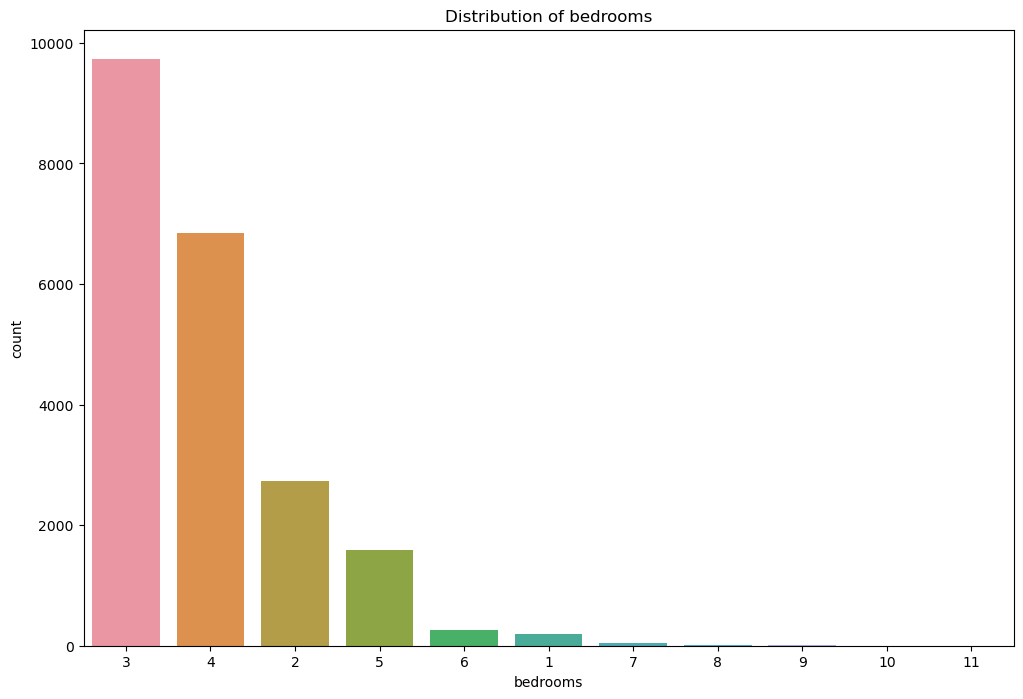

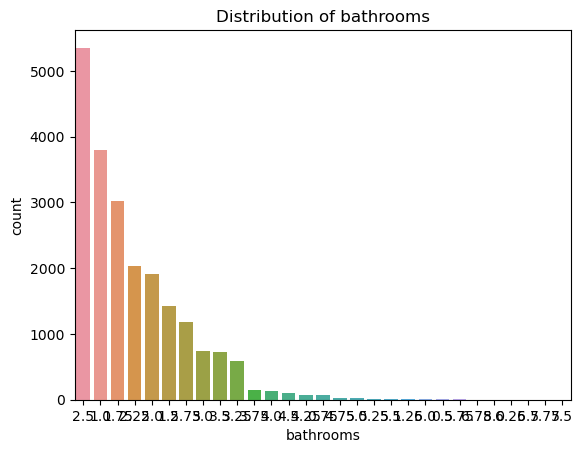

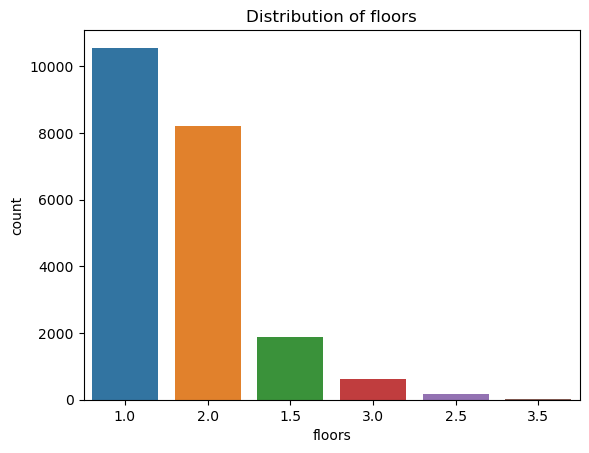

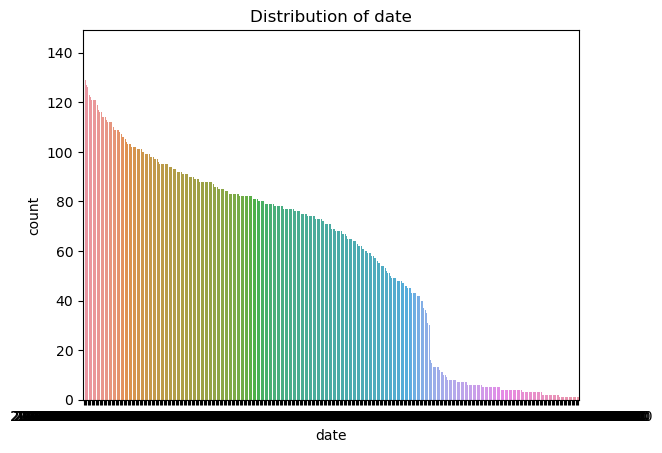

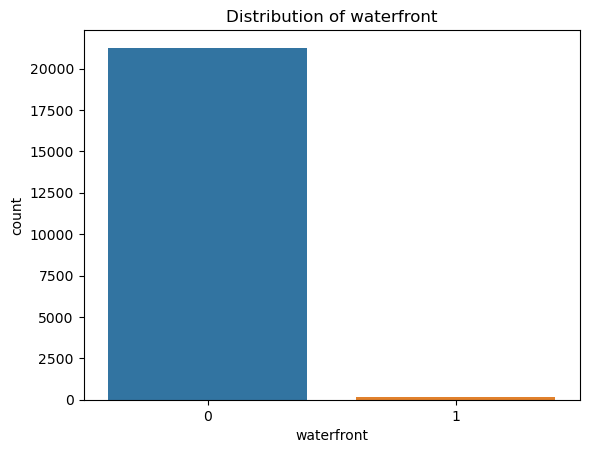

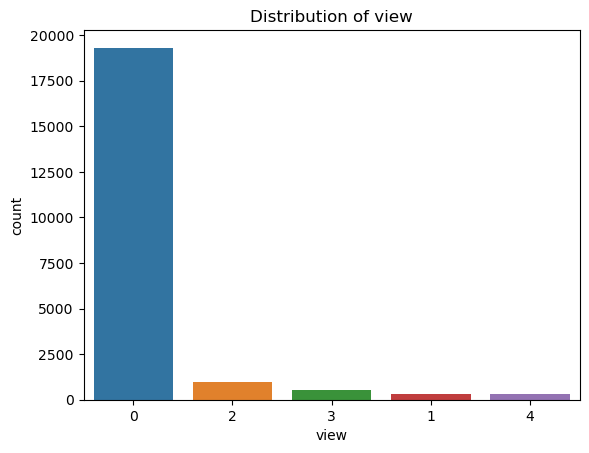

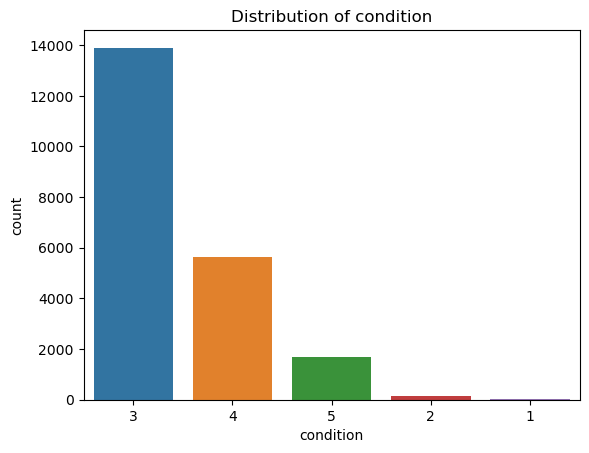

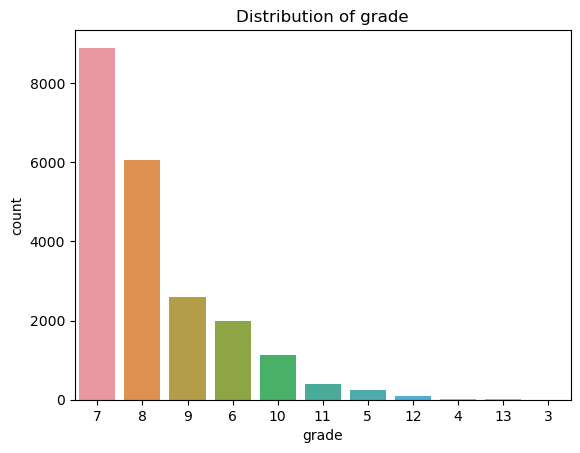

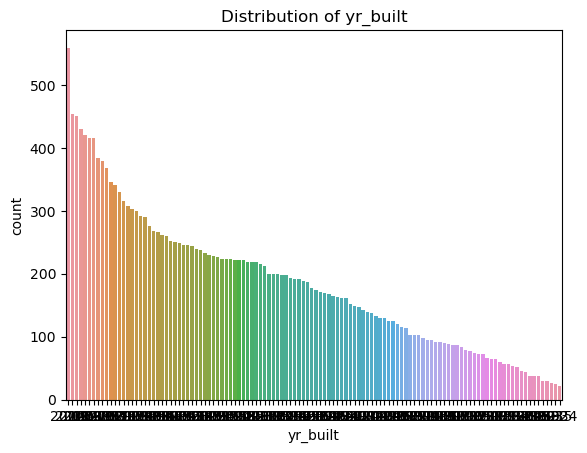

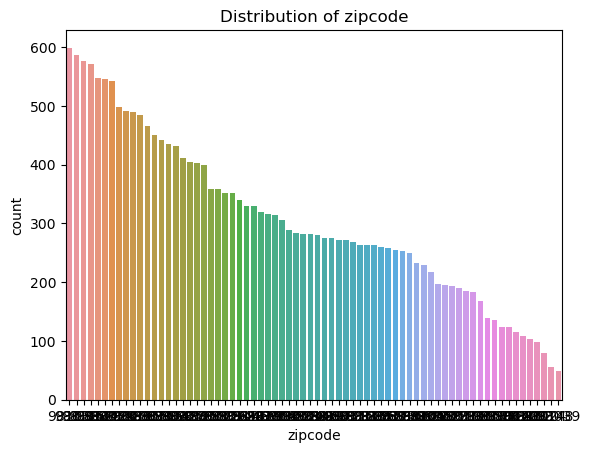

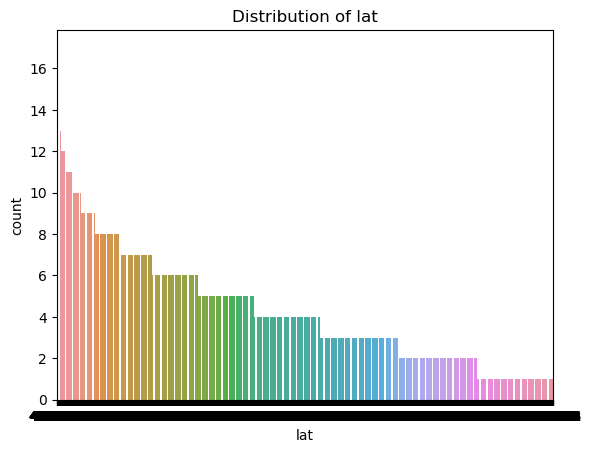

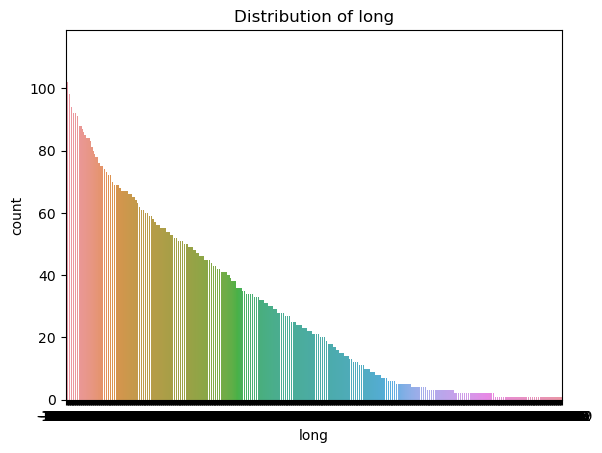

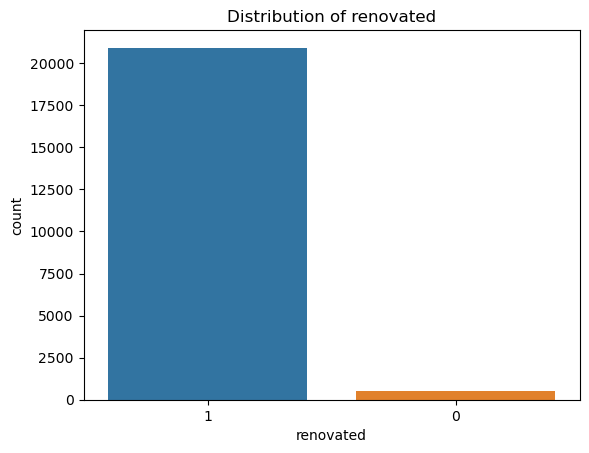

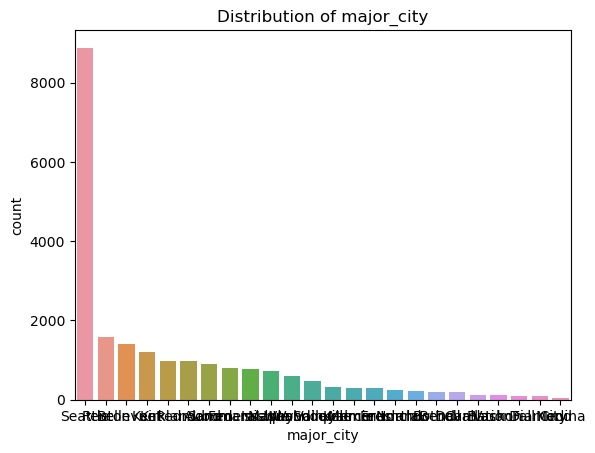

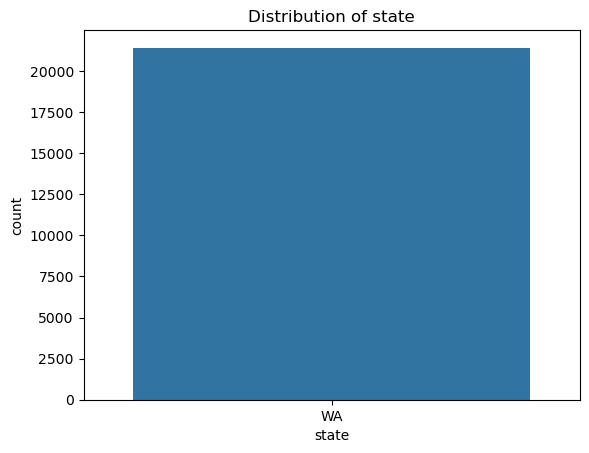

In [57]:
# Explore categorical variables using count plots
plt.figure(figsize=(12, 8))
for column in categoricals:
    sns.countplot(x=column, data=final_df, order=final_df[column].value_counts().index)
    plt.title(f'Distribution of {column}')
    plt.show()